In [1]:
import os
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL.Image
import PIL.ImageDraw
import numpy as np
import cv2
from matplotlib.patches import Rectangle
from PIL import Image

In [2]:
import cv2
import numpy as np
import insightface
from insightface.app import FaceAnalysis
from insightface.app import FaceAnalysis
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from insightface.data import get_image as ins_get_image
from insightface.utils.face_align import estimate_norm as align

In [3]:
#loading the image paths
labels = os.listdir("Images_Family")
label_img = []
for i in labels:
  list1 = os.listdir('Images_Family/'+ i)
  for j in list1:
    label_img.append(j)

In [4]:
len(label_img)

55

In [5]:
#loading the insightface model
app = FaceAnalysis(providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])
app.prepare(ctx_id=0 ,det_size=(640, 480))

c:\Users\Sucheta Jhunjhunwala\AppData\Local\Programs\Python\Python310\lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:54: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Sucheta Jhunjhunwala/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Sucheta Jhunjhunwala/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Sucheta Jhunjhunwala/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Sucheta Jhunjhunwala/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Sucheta Jhunjhunwala/.insight

In [6]:
#function to get the embedding of one person in the image
def display_image_coords(input_image):
    img = Image.open(input_image)
    result = app.get(np.asarray(img))
    q  = result[0].embedding
    return q


In [9]:
label_img[0].split(" ")

['Anouska', '(1).jpeg']

In [7]:
#creaing embddings for each image
emb_train=[]
emb_label =[]
emb_path =[]
for i in label_img:
  name_list = i.split(" ")
  name = name_list[0].capitalize()
  try:
    result = display_image_coords('Images_Family/'+name+'/'+ i)
    emb_train.append(result)
    emb_label.append(name)
    emb_path.append('Images_Family/'+name+'/'+ i)
  except:
    pass

c:\Users\Sucheta Jhunjhunwala\AppData\Local\Programs\Python\Python310\lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [8]:
# Train KNN classifier
nn = NearestNeighbors(n_neighbors=3, metric="cosine")
nn.fit(X=emb_train)

NearestNeighbors(metric='cosine', n_neighbors=3)

In [9]:
#function to find the labels of the images recognisd using knn
def knn(j):
  img = Image.open(j)
  img_emb = app.get(np.asarray(img))[0].embedding

  # get pred from KNN
  dists, inds = nn.kneighbors(X=img_emb.reshape(1,-1), n_neighbors=3, return_distance=True)

  # get labels of the neighbours
  pred_labels = [emb_label[i] for i in inds[0]]
  return pred_labels

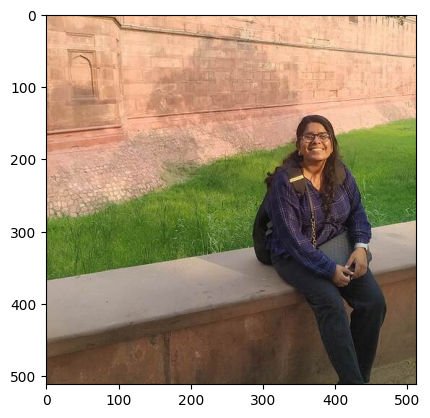

In [20]:
import matplotlib.pyplot as plt
img = cv2.imread('Test_images\8.jfif')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB ))

In [21]:
print(knn('Test_images\8.jfif'))

c:\Users\Sucheta Jhunjhunwala\AppData\Local\Programs\Python\Python310\lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


['Sucheta', 'Sucheta', 'Sucheta']


c:\Users\Sucheta Jhunjhunwala\AppData\Local\Programs\Python\Python310\lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


['Anouska', 'Anouska', 'Anouska']


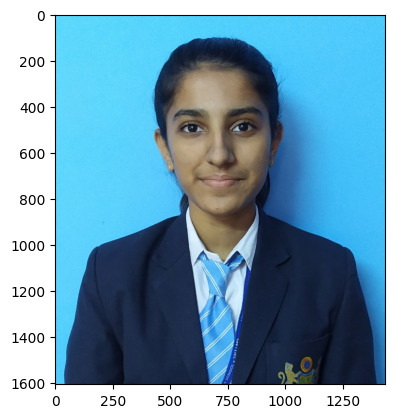

In [27]:
import matplotlib.image as mpimg
img = cv2.imread('Test_images/7.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB ))
print(knn('Test_images/7.jpg'))

In [28]:

import gradio as gr
from PIL import Image

# Define the input and output interfaces using Gradio
input_image = gr.inputs.Image()
output_text = gr.outputs.Textbox()

#function to find the label from knn and distance from the matched face embedding
#def predict_knn(img_fpath, emb_label=emb_label, verbose = False):
def predict_knn(image, emb_label=emb_label, verbose = False):
    #img = Image.open(img_fpath)
    img_emb = app.get(np.asarray(image))[0].embedding

    # get pred from KNN
    dists, inds = nn.kneighbors(X=img_emb.reshape(1,-1), n_neighbors=3, return_distance=True)

    # get labels of the neighbours
    pred_labels = [emb_label[i] for i in inds[0]]

    # check if any dist is greater than 0.5, and if so, print the results
    no_of_matching_faces = np.sum([1 if d <=0.6 else 0 for d in dists[0]])
    if no_of_matching_faces > 0:
        verbose = True
        
    return "The person is "+str(pred_labels[0])

# Create the Gradio interface
interface = gr.Interface(fn=predict_knn,  inputs=input_image, outputs=output_text, title="Face Recognition")
interface.launch(inline=True, share=True)

c:\Users\Sucheta Jhunjhunwala\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Sucheta Jhunjhunwala\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
c:\Users\Sucheta Jhunjhunwala\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
c:\Users\Sucheta Jhunjhunwala\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your compone

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://27299187ee98fab8b8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


c:\Users\Sucheta Jhunjhunwala\AppData\Local\Programs\Python\Python310\lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4
